In [2]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('data/cropdata.csv')
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [4]:
result1 = df['result']

# Filter and print rows where result1 is 1
print(df.shape)
print(df[result1 == 0].shape)
print(df[result1 == 1].shape)
print(df[result1 == 2].shape)

(16411, 7)
(9062, 7)
(6227, 7)
(1122, 7)


In [5]:
df = df[df['result'] != 2]

df.shape
print(df.shape)
print(df[result1 == 0].shape)
print(df[result1 == 1].shape)
print(df[result1 == 2].shape)

(15289, 7)
(9062, 7)
(6227, 7)
(0, 7)


C:\Users\yiish\AppData\Local\Temp\ipykernel_5532\3488195233.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[result1 == 0].shape)
C:\Users\yiish\AppData\Local\Temp\ipykernel_5532\3488195233.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[result1 == 1].shape)
C:\Users\yiish\AppData\Local\Temp\ipykernel_5532\3488195233.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(df[result1 == 2].shape)


In [6]:
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,Wheat,Black Soil,Germination,1,25,80.0,1
1,Wheat,Black Soil,Germination,2,26,77.0,1
2,Wheat,Black Soil,Germination,3,27,74.0,1
3,Wheat,Black Soil,Germination,4,28,71.0,1
4,Wheat,Black Soil,Germination,5,29,68.0,1


In [7]:
encoder = LabelEncoder()
df['soil_type'] = encoder.fit_transform(df['soil_type'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['crop ID'] = encoder.fit_transform(df['crop ID'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))
df['Seedling Stage'] = encoder.fit_transform(df['Seedling Stage'])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


{'Alluvial Soil': 0, 'Black Soil': 1, 'Chalky Soil': 2, 'Clay Soil': 3, 'Loam Soil': 4, 'Red Soil': 5, 'Sandy Soil': 6}
{'Carrot': 0, 'Chilli': 1, 'Potato': 2, 'Tomato': 3, 'Wheat': 4}
{'Flowering': 0, 'Fruit/Grain/Bulb Formation': 1, 'Germination': 2, 'Harvest': 3, 'Maturation': 4, 'Pollination': 5, 'Seedling Stage': 6, 'Vegetative Growth / Root or Tuber Development': 7}


In [8]:
df.head()

,crop ID,soil_type,Seedling Stage,MOI,temp,humidity,result
0,4,1,2,1,25,80.0,1
1,4,1,2,2,26,77.0,1
2,4,1,2,3,27,74.0,1
3,4,1,2,4,28,71.0,1
4,4,1,2,5,29,68.0,1


In [9]:
x = df.drop('result', axis=1)
y = df['result']
scaler = StandardScaler()

x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

x.head()


,crop ID,soil_type,Seedling Stage,MOI,temp,humidity
0,1.04488,-1.396438,-0.677959,-1.511336,-0.344172,0.685703
1,1.04488,-1.396438,-0.677959,-1.474419,-0.241438,0.552780
2,1.04488,-1.396438,-0.677959,-1.437502,-0.138704,0.419857
3,1.04488,-1.396438,-0.677959,-1.400585,-0.035969,0.286934
4,1.04488,-1.396438,-0.677959,-1.363668,0.066765,0.154011


In [10]:
from keras.models import Sequential
from keras.layers import Dense


vanilla = Sequential()
vanilla.add(Dense(64, activation="relu", input_shape=(x.shape[1],)))
vanilla.add(Dense(32, activation="relu"))
vanilla.add(Dense(1, activation="sigmoid"))
vanilla.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [11]:
vanilla.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer="adam"
)

vanilla_train = vanilla.fit(
    x, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)

vanilla.save('saved_models/model1.keras')

Epoch 1/100
383/383 [==============================] - 3s 4ms/step - loss: 0.2486 - accuracy: 0.8960 - precision: 0.9287 - recall: 0.8108 - val_loss: 0.1440 - val_accuracy: 0.9323 - val_precision: 1.0000 - val_recall: 0.8229
Epoch 2/100
383/383 [==============================] - 2s 5ms/step - loss: 0.1248 - accuracy: 0.9504 - precision: 0.9528 - recall: 0.9259 - val_loss: 0.1055 - val_accuracy: 0.9552 - val_precision: 0.9981 - val_recall: 0.8845
Epoch 3/100
383/383 [==============================] - 1s 4ms/step - loss: 0.1095 - accuracy: 0.9544 - precision: 0.9505 - recall: 0.9385 - val_loss: 0.1009 - val_accuracy: 0.9595 - val_precision: 0.9934 - val_recall: 0.8999
Epoch 4/100
383/383 [==============================] - 1s 3ms/step - loss: 0.1006 - accuracy: 0.9601 - precision: 0.9525 - recall: 0.9510 - val_loss: 0.1031 - val_accuracy: 0.9578 - val_precision: 0.9952 - val_recall: 0.8939
Epoch 5/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0947 - accuracy: 0.9621

In [34]:
vanilla_loss, vanilla_accuracy, vanilla_precision, vanilla_recall = vanilla.evaluate(x, y)
print(f'Vanilla model - Test Accuracy: {vanilla_accuracy}, Precision: {vanilla_precision}, Recall: {vanilla_recall}, Loss: {vanilla_loss}')


478/478 [==============================] - 1s 3ms/step - loss: 0.1099 - accuracy: 0.9908 - precision: 0.9971 - recall: 0.9804
Vanilla model - Test Accuracy: 0.9908431172370911, Precision: 0.997060239315033, Recall: 0.9804078936576843, Loss: 0.1099228709936142


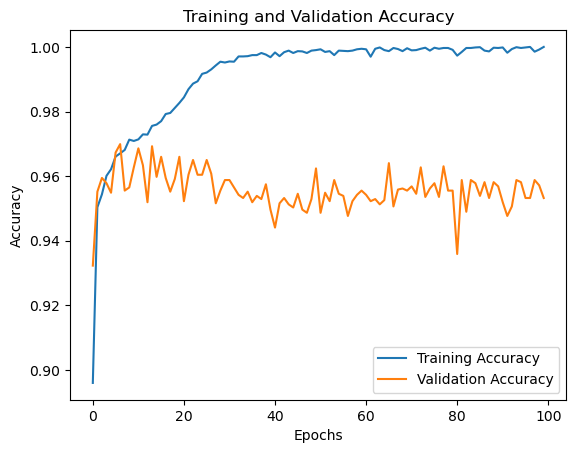

In [35]:
# Plot accuracy


plt.plot(vanilla_train.history['accuracy'], label='Training Accuracy')
plt.plot(vanilla_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

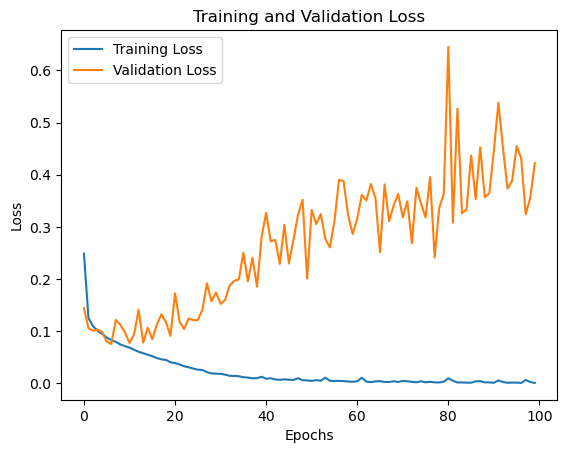

In [29]:
import matplotlib.pyplot as plt


plt.plot(vanilla_train.history['loss'], label='Training Loss')
plt.plot(vanilla_train.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1
from keras.callbacks import EarlyStopping


optminal = Sequential()
optminal.add(Dense(64, activation="relu", input_shape=(x.shape[1],), kernel_regularizer=l1(l1=0.001)))
optminal.add(Dropout(0.4))
optminal.add(Dense(32, activation="relu", kernel_regularizer=l1(l1=0.001)))
optminal.add(Dropout(0.4))
optminal.add(Dense(1, activation="sigmoid", kernel_regularizer=l1(l1=0.001)))

early_stop = EarlyStopping(monitor='val_loss', patience=10, mode='auto', verbose=1)
optminal.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [15]:
optminal.compile(
    loss="binary_crossentropy", metrics=["accuracy", "Precision", "Recall"], optimizer="adam"
)

optimal_train = vanilla.fit(
    x, y, epochs=100, batch_size=32, validation_split=0.2, verbose=1
)

optminal.save('saved_models/model2.keras')

Epoch 1/100
383/383 [==============================] - 1s 4ms/step - loss: 7.1259e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.3679 - val_accuracy: 0.9595 - val_precision: 0.9833 - val_recall: 0.9093
Epoch 2/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0047 - accuracy: 0.9986 - precision: 0.9982 - recall: 0.9984 - val_loss: 0.4429 - val_accuracy: 0.9500 - val_precision: 0.9857 - val_recall: 0.8820
Epoch 3/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0012 - accuracy: 0.9997 - precision: 0.9994 - recall: 0.9998 - val_loss: 0.3476 - val_accuracy: 0.9595 - val_precision: 0.9780 - val_recall: 0.9145
Epoch 4/100
383/383 [==============================] - 1s 3ms/step - loss: 0.0017 - accuracy: 0.9997 - precision: 0.9996 - recall: 0.9996 - val_loss: 0.4030 - val_accuracy: 0.9578 - val_precision: 0.9860 - val_recall: 0.9025
Epoch 5/100
383/383 [==============================] - 1s 3ms/step - loss: 7.3578e-04 - accuracy